In [239]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

In [240]:
filename = 'courseRecSys.xlsx'

In [241]:
def read_data(filename):
    df = pd.read_excel(filename,
    header=0,
    index_col=False,
    keep_default_na=True
    )
    return df

In [242]:
def preprocess(df):
    df=df.drop(['Start time','Completion time','Email','Name','Name(not mandatory)\n','ID'], axis=1)
    #replacing nan with mean of users
    # df["avg"] = df.mean(axis = 1, skipna=True, numeric_only=True)
    # df=df.apply(lambda row: row.fillna(row["avg"]), axis=1)
    # df = df.drop(["avg"],axis =1)
    #replacing nan with mean of courses
    df["avg"] = df.mean(axis = 0, skipna=True, numeric_only=True)
    df=df.apply(lambda x: x.fillna(x.mean()),axis=0)
    df = df.drop(["avg"],axis =1)
    return df

In [243]:
df=read_data(filename)
df = preprocess(df)
df

,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.30,0.85,0.85,0.90,0.70,0.70,0.80,0.620098,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.600000,0.423286,0.396622,0.510897
1,0.70,0.80,0.20,0.80,0.80,0.50,0.10,0.200000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.500000,0.423286,0.396622,0.510897
2,0.70,0.00,1.00,1.00,1.00,1.00,1.00,0.800000,0.900000,1.000000,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.400000,0.423286,0.396622,0.510897
3,0.65,0.70,0.20,0.75,0.75,0.75,0.75,0.750000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.800000,0.452708,0.423286,0.800000,0.510897
4,0.70,0.60,0.20,0.00,0.80,0.50,0.60,0.400000,0.400000,0.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.00,1.00,0.50,0.70,0.60,0.50,0.30,0.700000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.000000,0.423286,0.396622,0.510897
158,1.00,0.00,0.00,0.70,0.70,0.00,0.00,0.000000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.452708,0.423286,0.396622,0.200000
159,0.60,0.30,0.40,0.90,0.80,0.70,0.40,0.500000,0.400000,0.200000,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,1.000000,0.423286,0.396622,1.000000
160,0.80,0.60,0.20,0.40,0.70,0.70,0.80,0.620098,0.572638,0.700000,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.452708,0.423286,0.396622,0.510897


change 0.5 to average of ratings of that user

In [244]:
# df["avg"] = df.mean(axis = 1, skipna=True, numeric_only=True)
# df= df.apply(lambda row: row.fillna(row["avg"]), axis=1)
# df = df.drop(["avg"],axis =1)
# df

In [245]:
df.isna().sum()

Data Structures and Algorithms                                0
Computer Architecture\n                                       0
Discrete Mathematics\n                                        0
Economics                                                     0
Programming-2                                                 0
Machine Learning\n                                            0
Mathematics For Machine Learning\n                            0
Visual Recognition\n                                          0
Natural Language Processing\n                                 0
Reinforcement Learning                                        0
Software Production Engineering\n                             0
Computer Graphics\n                                           0
Data Visualization\n                                          0
Programming Languages\n                                       0
Cloud Computing\n                                             0
Digital CMOS VLSI Design                

In [246]:
courses = df.columns
courses

Index(['Data Structures and Algorithms', 'Computer Architecture\n',
       'Discrete Mathematics\n', 'Economics', 'Programming-2',
       'Machine Learning\n', 'Mathematics For Machine Learning\n',
       'Visual Recognition\n', 'Natural Language Processing\n',
       'Reinforcement Learning', 'Software Production Engineering\n',
       'Computer Graphics\n', 'Data Visualization\n',
       'Programming Languages\n', 'Cloud Computing\n',
       'Digital CMOS VLSI Design ', 'System design with FPGA ', 'ASIC design ',
       'VLSI Architecture Design\n',
       'High level synthesis and optimization of Digital Circuits ',
       'Digital Sociology ', 'Privacy in the Digital Age',
       'Technology Ethics and AI ', 'Techno-economics of networks ',
       'The Web and the Mind '],
      dtype='object')

In [247]:
core_courses = ['Data Structures and Algorithms','Computer Architecture\n','Discrete Mathematics\n','Economics','Programming-2']

In [248]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
# kmeans.fit_predict(df[courses])    
kmeans.fit_predict(df[core_courses])    

array([0, 1, 0, 1, 1, 0, 2, 1, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 2, 1, 1, 1, 2, 0, 0, 1, 0, 0, 2, 2, 1, 0, 1, 0,
       1, 0, 0, 2, 1, 1, 1, 0, 2, 0, 0, 1, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       2, 1, 0, 0, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 2, 0, 2, 2, 1, 0, 1, 0,
       1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1,
       2, 1, 0, 0, 1, 2, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       1, 0, 2, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 2], dtype=int32)

In [249]:
wcss = []  #Within Cluster Sum of Squares
for number_of_clusters in range(1, 15): 
    kmeans = KMeans(n_clusters = number_of_clusters, random_state = 42)
    kmeans.fit(df[core_courses]) 
    wcss.append(kmeans.inertia_)
wcss

[82.1122601552986,
 63.240786484853075,
 51.758327711871004,
 44.96053632709338,
 39.89398687872323,
 36.14482368312088,
 33.39870202326004,
 30.5695359693512,
 28.1421428563879,
 25.495720837938922,
 24.303521924994463,
 22.250775245363172,
 21.26505642848125,
 19.7185773653146]

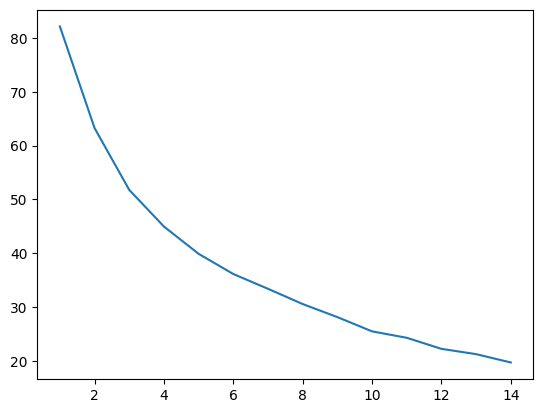

In [250]:
ks = [1, 2, 3, 4, 5 , 6 , 7 , 8, 9, 10,11,12,13,14]
plt.plot(ks, wcss)

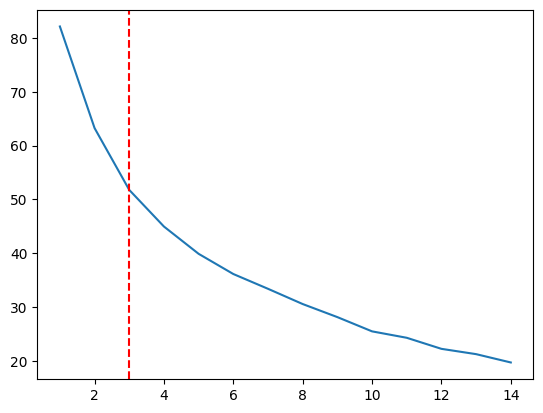

In [251]:
ks = [1, 2, 3, 4, 5 , 6 , 7 , 8, 9, 10,11,12,13,14]
plt.plot(ks, wcss);
plt.axvline(3, linestyle='--', color='r')

In [252]:
k = 10
kmeans = KMeans(n_clusters = k, random_state = 42)
clustered_matrix = kmeans.fit_predict(df[core_courses]) 


In [253]:
kmeans.cluster_centers_

array([[0.64285714, 0.04285714, 0.91428571, 0.02142857, 0.91428571],
       [0.92545455, 0.87545455, 0.91575758, 0.8730303 , 0.94363636],
       [0.65      , 0.2       , 0.21666667, 0.76111111, 0.79444444],
       [0.8425    , 0.505     , 0.165     , 0.1       , 0.88      ],
       [0.97692308, 0.96153846, 0.98384615, 0.04615385, 0.96923077],
       [0.77142857, 0.91428571, 0.88571429, 0.44285714, 0.18571429],
       [0.91923077, 0.90769231, 0.14615385, 0.90384615, 0.80384615],
       [0.88888889, 0.21333333, 0.85      , 0.85      , 0.88888889],
       [0.21263684, 0.895     , 0.48623536, 0.94725284, 0.73878777],
       [0.8353125 , 0.7946875 , 0.6403125 , 0.6065625 , 0.8303125 ]])

In [254]:

    
df.head()


,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.30,0.85,0.85,0.90,0.70,0.70,0.80,0.620098,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.600000,0.423286,0.396622,0.510897
1,0.70,0.80,0.20,0.80,0.80,0.50,0.10,0.200000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.500000,0.423286,0.396622,0.510897
2,0.70,0.00,1.00,1.00,1.00,1.00,1.00,0.800000,0.900000,1.000000,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.400000,0.423286,0.396622,0.510897
3,0.65,0.70,0.20,0.75,0.75,0.75,0.75,0.750000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.800000,0.452708,0.423286,0.800000,0.510897
4,0.70,0.60,0.20,0.00,0.80,0.50,0.60,0.400000,0.400000,0.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [255]:
a = np.array([12,2,3])
b = np.array([2,2,3])
c = a+b
c

array([14,  4,  6])

In [256]:
arr = df.to_numpy()
arr[0].shape

(25,)

In [257]:
clustered_df =[]
for i in range(k):
    # print(k)
    users = 0
    s=np.zeros(25)
    for j in range(len(clustered_matrix)):#162
        
        if clustered_matrix[j]==i:
            # print("Matched")
            s+=arr[j]
            users = users + 1
    print(s)
    print(users)
    mean = s/users
    clustered_df.append(mean)







[4.5        0.3        6.4        0.15       6.4        6.8
 6.7        5.6        3.57263815 4.40349544 3.8759434  2.45621694
 3.18840993 4.6        4.172587   1.35153846 0.34631579 0.41480519
 1.33486842 0.36805556 0.86824324 1.45270829 1.82328571 0.89662162
 3.02179487]
7
[30.54       28.89       30.22       28.81       31.14       26.73662845
 26.6781117  23.43087785 18.03957222 18.95243156 22.16320755 16.51838634
 23.34932906 21.26371681 21.93880497  8.47923077  8.82631579  8.5961039
  8.29736842  7.36111111 14.39662162 14.12333271 15.39571429 17.48243243
 16.55705128]
33
[11.7         3.6         3.9        13.7        14.3        13.00666121
  9.5         8.62009754  8.48110519  8.7279635  11.63160377  8.69351858
 10.13045957  8.3300885  11.08069599  3.57        3.60210526  3.09246753
  3.35328947  2.48472222  7.61891892  9.17166636  8.47942857  8.15608108
 11.68717949]
18
[16.85       10.1         3.3         2.         17.6        15.75666121
 11.92258739 10.69019508 10.530552

In [258]:
(clustered_df)

[array([0.64285714, 0.04285714, 0.91428571, 0.02142857, 0.91428571,
        0.97142857, 0.95714286, 0.8       , 0.51037688, 0.62907078,
        0.5537062 , 0.35088813, 0.45548713, 0.65714286, 0.59608386,
        0.19307692, 0.04947368, 0.05925788, 0.19069549, 0.05257937,
        0.12403475, 0.20752976, 0.26046939, 0.1280888 , 0.43168498]),
 array([0.92545455, 0.87545455, 0.91575758, 0.8730303 , 0.94363636,
        0.81020086, 0.80842763, 0.7100266 , 0.5466537 , 0.57431611,
        0.67161235, 0.50055716, 0.70755543, 0.64435505, 0.66481227,
        0.25694639, 0.26746411, 0.260488  , 0.25143541, 0.22306397,
        0.43626126, 0.42797978, 0.4665368 , 0.52977068, 0.50172883]),
 array([0.65      , 0.2       , 0.21666667, 0.76111111, 0.79444444,
        0.72259229, 0.52777778, 0.47889431, 0.47117251, 0.48488686,
        0.64620021, 0.48297325, 0.56280331, 0.46278269, 0.61559422,
        0.19833333, 0.20011696, 0.17180375, 0.18629386, 0.13804012,
        0.42327327, 0.50953702, 0.47107937, 

In [259]:
df = pd.DataFrame(clustered_df, columns = courses)
df

,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.642857,0.042857,0.914286,0.021429,0.914286,0.971429,0.957143,0.800000,0.510377,0.629071,...,0.193077,0.049474,0.059258,0.190695,0.052579,0.124035,0.207530,0.260469,0.128089,0.431685
1,0.925455,0.875455,0.915758,0.873030,0.943636,0.810201,0.808428,0.710027,0.546654,0.574316,...,0.256946,0.267464,0.260488,0.251435,0.223064,0.436261,0.427980,0.466537,0.529771,0.501729
2,0.650000,0.200000,0.216667,0.761111,0.794444,0.722592,0.527778,0.478894,0.471173,0.484887,...,0.198333,0.200117,0.171804,0.186294,0.138040,0.423273,0.509537,0.471079,0.453116,0.649288
3,0.842500,0.505000,0.165000,0.100000,0.880000,0.787833,0.596129,0.534510,0.526528,0.580024,...,0.238038,0.188895,0.164442,0.182204,0.108819,0.197297,0.313448,0.329314,0.213649,0.378269
4,0.976923,0.961538,0.983846,0.046154,0.969231,0.892308,0.830769,0.509238,0.780406,0.708230,...,0.365740,0.345020,0.296863,0.303036,0.205556,0.199324,0.535240,0.393571,0.229470,0.638807
5,0.771429,0.914286,0.885714,0.442857,0.185714,0.843809,0.788941,0.577171,0.631131,0.529570,...,0.179231,0.219850,0.092059,0.272086,0.157738,0.136390,0.186488,0.267122,0.227124,0.247527
6,0.919231,0.907692,0.146154,0.903846,0.803846,0.839486,0.653475,0.693099,0.619519,0.648574,...,0.269941,0.344453,0.306833,0.277632,0.116346,0.449688,0.551042,0.454582,0.544335,0.522929
7,0.888889,0.213333,0.850000,0.850000,0.888889,0.734073,0.691399,0.571133,0.552515,0.545221,...,0.189573,0.176140,0.195469,0.171053,0.152469,0.406081,0.616968,0.543683,0.588138,0.560399
8,0.212637,0.895000,0.486235,0.947253,0.738788,0.692587,0.632776,0.566297,0.604173,0.667003,...,0.196077,0.182421,0.150364,0.164408,0.137639,0.222770,0.535708,0.426300,0.447973,0.596538
9,0.835312,0.794688,0.640312,0.606563,0.830313,0.825833,0.777823,0.676277,0.578507,0.661232,...,0.293822,0.294967,0.239091,0.274445,0.212413,0.295355,0.499538,0.444862,0.375697,0.502804


In [260]:
# svd = TruncatedSVD(n_components=5, n_iter=100, random_state=42)

In [261]:
# truncated_matrix = svd.fit_transform(clustered_df)
# truncated_matrix.shape

In [262]:
# print(svd.explained_variance_ratio_)
# eigen_values = svd.explained_variance_ratio_

In [263]:
import numpy as np

def reduced_svd(A):
    
    # Step 1: Compute the transpose of A
    AT = A.T
    # Step 2: Compute the product A x AT
    ATA = A.dot(AT)
    # Step 3: Compute the eigenvalues and eigenvectors of ATA
    eigenvalues, eigenvectors = np.linalg.eig(ATA)
    # Step 4: Sort the eigenvalues in descending order
    sorted_idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[sorted_idx]
    eigenvectors = eigenvectors[:, sorted_idx]
    # Step 5: Compute the diagonal matrix Sigma
    Sigma = np.sqrt(eigenvalues)
    # Step 6: Compute the pseudo-inverse of Sigma
    inv_Sigma = np.zeros((A.shape[1], A.shape[0]))
    inv_Sigma[:A.shape[0], :A.shape[0]] = np.diag(1.0 / Sigma)
    # Step 7: Compute the product AT x V x inv(Sigma)
    V = AT.dot(eigenvectors)
    # Step 8: Normalize the columns of V
    V = V / np.linalg.norm(V, axis=0)
    # Step 9: Compute the product A x U x Sigma^-1
    U = A.dot(V) / Sigma
    return U, Sigma, V.T

In [264]:
# # import numpy as np

# def reduced_svd(A,k):
    
#     # Step 1: Compute the transpose of A
#     AT = A.T
#     # Step 2: Compute the product A x AT
#     ATA = A.dot(AT)
#     # Step 3: Compute the eigenvalues and eigenvectors of ATA
#     eigenvalues, eigenvectors = np.linalg.eig(ATA)
#     # Step 4: Sort the eigenvalues in descending order
#     sorted_idx = eigenvalues.argsort()[::-1]
#     eigenvalues = eigenvalues[sorted_idx][:k]
#     eigenvectors = eigenvectors[:, sorted_idx]
#     # Step 5: Compute the diagonal matrix Sigma
#     Sigma = np.sqrt(eigenvalues)
#     # Step 6: Compute the pseudo-inverse of Sigma
#     inv_Sigma = np.zeros((k,k))
#     inv_Sigma = np.diag(1.0 / Sigma)
#     # Step 7: Compute the product AT x V x inv(Sigma)
#     V = AT.dot(eigenvectors)
#     # Step 8: Normalize the columns of V
#     V = V / np.linalg.norm(V, axis=0)
#     # Step 9: Compute the product A x U x Sigma^-1
#     U = A.dot(V) / Sigma
#     return U, Sigma, V.T

In [265]:
U,sigma,VT = reduced_svd(np.array(clustered_df))

In [266]:
U.shape,sigma.shape,VT.shape

((10, 10), (10,), (10, 25))

In [267]:
k=6

In [268]:
reduced_matrix = np.dot(np.dot(U[:,:k],np.diag(sigma[:k])),VT[:k,:])
# reduced_matrix

In [269]:
reduced_matrix

array([[0.65654339, 0.03212368, 0.92983355, 0.00580498, 0.90459448,
        0.94954551, 0.92384315, 0.73773675, 0.51754344, 0.61541523,
        0.61986112, 0.38505271, 0.45164303, 0.69314327, 0.59956421,
        0.19006915, 0.04303058, 0.044063  , 0.17750715, 0.07968634,
        0.11247917, 0.21846356, 0.28547338, 0.12725153, 0.43636936],
       [0.8474483 , 0.80721556, 0.88199066, 0.84381185, 0.87253392,
        0.87216482, 0.82547731, 0.67568842, 0.66919407, 0.66879979,
        0.749909  , 0.50347427, 0.67332613, 0.53029013, 0.57690053,
        0.26579934, 0.27503898, 0.24051635, 0.26015319, 0.20034637,
        0.37068351, 0.56378698, 0.5041103 , 0.51452951, 0.60278904],
       [0.67058435, 0.24075761, 0.21374354, 0.7913396 , 0.87176162,
        0.68836754, 0.54339777, 0.56417601, 0.4353945 , 0.50881199,
        0.61305987, 0.41743119, 0.52682506, 0.4877593 , 0.58953079,
        0.18510905, 0.17520196, 0.18377425, 0.15993059, 0.10778886,
        0.40484742, 0.49791335, 0.45563575, 0.

In [270]:
# reduced_matrix = truncated_matrix

In [271]:
def EuclDist(vec1,vec2):
    return np.linalg.norm(vec1 - vec2)

new user with just core courses ratings. Now we need elective courses

In [272]:
new_user = [0.2,0.8,0.2,0.6,0.9]
new_user2 =[ 0.699459,	0.545405	,0.325405	,0.615135	,0.737838]
sooraj = [0.4, 0.8,0.85,0.9,0.7]
chinmay = [0.9,0.2,0.4,0.6 ,0.8]

In [273]:

def find_cluster(reduced_matrix,new_user):
    
    min=EuclDist(reduced_matrix[0,:5],new_user)
    cluster = 0
    for i in range(len(reduced_matrix)):
        sim = EuclDist(reduced_matrix[i,:5],new_user)#euclidean distance
        # print(sim)
        if sim<min:
            min = sim
            cluster=i
    return cluster


In [279]:
find_cluster(reduced_matrix,chinmay)

2

In [275]:
def find_elective_ratings(reduced_matrix,new_user):
    cluster = find_cluster(reduced_matrix,new_user)
    elective_ratings = reduced_matrix[cluster,5:]
    return elective_ratings


In [276]:
elective_ratings = find_elective_ratings(reduced_matrix,chinmay)

# ranking of electives

In [277]:
d={courses[5:][i]: elective_ratings[i] for i in range(20)}

elective_ranked = sorted(courses[5:], key=lambda x : d[x])

In [278]:
elective_ranked

['High level synthesis and optimization of Digital Circuits ',
 'VLSI Architecture Design\n',
 'System design with FPGA ',
 'ASIC design ',
 'Digital CMOS VLSI Design ',
 'Digital Sociology ',
 'Computer Graphics\n',
 'Natural Language Processing\n',
 'Technology Ethics and AI ',
 'Programming Languages\n',
 'Techno-economics of networks ',
 'Privacy in the Digital Age',
 'Reinforcement Learning',
 'Data Visualization\n',
 'The Web and the Mind ',
 'Mathematics For Machine Learning\n',
 'Visual Recognition\n',
 'Cloud Computing\n',
 'Software Production Engineering\n',
 'Machine Learning\n']

change the nan values to average of the item instead of average of user ratings.

in find elective rating find the ratings from the clustered matrix and not reduced matrix.